Data Analyzed- vehicle_waypoint_2.csv


data 20- taken till 1500 data point due to noise

In [270]:
import pandas as pd

input_file='/content/vehicle_waypoint_21.csv'
output_file='/content/interpolated_vehicle_waypoint_21.csv'

data=pd.read_csv(input_file)

data.iloc[:, 1]

0      -1.175553
1      -1.174863
2      -1.174086
3      -1.174522
4      -1.173706
          ...   
4903    0.994315
4904    0.994295
4905    0.994313
4906    0.994498
4907    0.995303
Name: Y, Length: 4908, dtype: float64

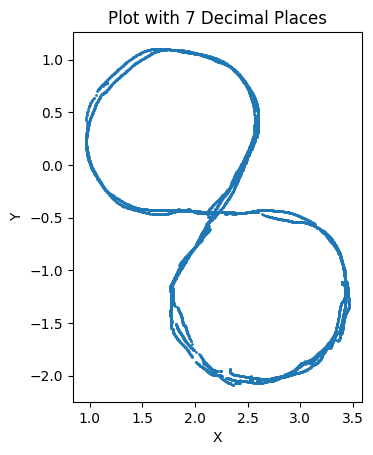

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Create x and y data with 7 decimal places
x = data.iloc[:, 0]
y = data.iloc[:, 1]

#plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal')

# Create a plot
plt.scatter(x, y, s=1)

# Set labels for the x and y axes
plt.xlabel('X')
plt.ylabel('Y')

# Set the title of the plot
plt.title('Plot with 7 Decimal Places')

# Display the plot
plt.show()



Conclusion: origin is where the headphone was kept during data collection

In [ ]:
[i for i in range(0,len(data)) ]


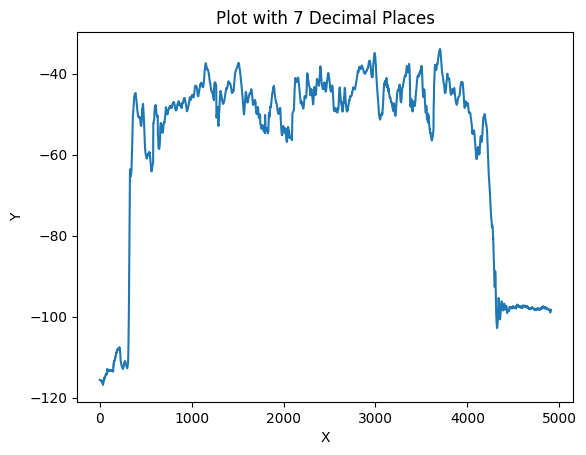

In [272]:
x = [i for i in range(0,len(data)) ]
y = data.iloc[:, 4]

# Create a plot
plt.plot(x, y)

# Set labels for the x and y axes
plt.xlabel('X')
plt.ylabel('Y')

# Set the title of the plot
plt.title('Plot with 7 Decimal Places')

# Display the plot
plt.show()

Conclusion: The yaw is absolute heading

In [ ]:
import numpy as np



In [94]:
avg=0
for i in range(0,800):
  x1 = data.iloc[i, 0]
  y1 = data.iloc[i, 1]
  x2 = data.iloc[i+1, 0]
  y2 = data.iloc[i+1, 1]

  distance=np.sqrt((x1-x2)**2+(y1-y2)**2)
  avg=avg+((1/(i+1))*(distance-avg))

avg


0.004715735441631957

In [97]:
avg_yaw=0
for i in range(0,1600):
  theta1 = data.iloc[i, 4]
  theta2 = data.iloc[i+1, 4]


  heading_diff=theta2-theta1
  avg_yaw=avg_yaw+((1/(i+1))*(heading_diff-avg_yaw))

avg_yaw

0.04152574378343199

In [273]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
heading=data.iloc[:,4]

# Define the threshold for interpolation
threshold = 0.008 # Change this value as needed


# Initialize arrays to store interpolated points
interpolated_x = [x[0]]
interpolated_y = [y[0]]
interpolated_heading=[heading[0]]

mean=0.0
std_dev=0.17

# Iterate through the original points
for i in range(1, len(x)):
    # Calculate the distance between the current and previous point
    dist = np.sqrt((x[i] - x[i - 1])**2 + (y[i] - y[i - 1])**2)

    # Determine how many points to interpolate between the current and previous points
    num_interpolated_points = int(dist / threshold)

    # Interpolate points between the current and previous points
    if num_interpolated_points > 0:
        x_interp = np.linspace(x[i - 1], x[i], num=num_interpolated_points + 2)[1:-1]
        y_interp = np.linspace(y[i - 1], y[i], num=num_interpolated_points + 2)[1:-1]

        # Append the interpolated points to the arrays
        interpolated_x.extend(x_interp)
        interpolated_y.extend(y_interp)

    for j in range(num_interpolated_points):
        sampled_heading=np.random.normal(mean, std_dev)
        #print(interpolated_heading)
        interpolated_heading.append(interpolated_heading[-1] + sampled_heading)

    # Append the current point to the arrays
    interpolated_x.append(x[i])
    interpolated_y.append(y[i])
    interpolated_heading.append(heading[i])

# Convert the interpolated points to numpy arrays
interpolated_x = np.array(interpolated_x)
interpolated_y = np.array(interpolated_y)
interpolated_heading=np.array(interpolated_heading)

# Print the interpolated points
#for x_val, y_val in zip(interpolated_x, interpolated_y):
#    print(f'({x_val}, {y_val})')

Text(0, 0.5, 'Y')

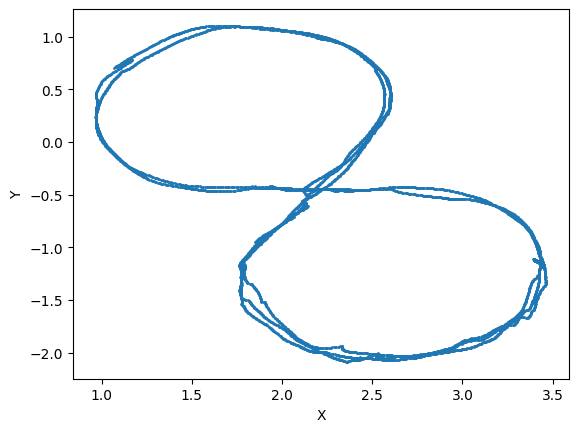

In [274]:
plt.scatter(interpolated_x, interpolated_y, s=1)
#plt.scatter(x, y,  'r-', label='Interpolated Data')
# Set labels for the x and y axes
plt.xlabel('X')
plt.ylabel('Y')

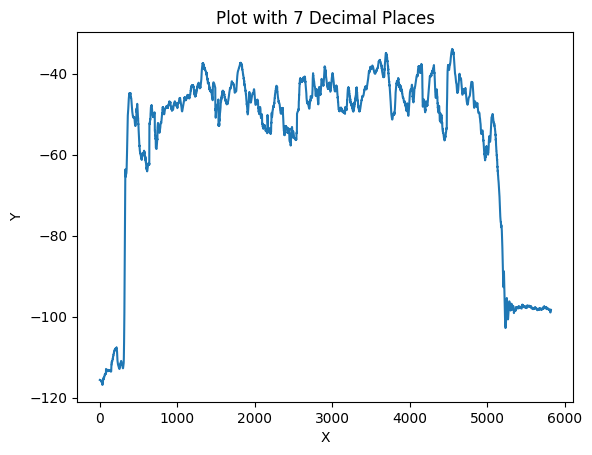

In [275]:
x = [i for i in range(0,len(interpolated_heading)) ]
y = interpolated_heading

# Create a plot
plt.plot(x, y)

# Set labels for the x and y axes
plt.xlabel('X')
plt.ylabel('Y')

# Set the title of the plot
plt.title('Plot with 7 Decimal Places')

# Display the plot
plt.show()

In [276]:
print(len(interpolated_x), len(interpolated_y), len(interpolated_heading))

5820 5820 5820


In [277]:
df = pd.DataFrame({'X': interpolated_x, 'Y': interpolated_y, 'Yaw': interpolated_heading})

# Define the file path
file_path = output_file  # Change the file extension as needed (e.g., '.csv', '.txt')

# Write the DataFrame to a file with headers and separated by commas (CSV format)
df.to_csv(file_path, index=False)  # Set index=False to exclude row numbers
